In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\hard work pays off/Linear_X_train.csv")
Y=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\hard work pays off/Linear_Y_train.csv")

In [3]:
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
Y.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


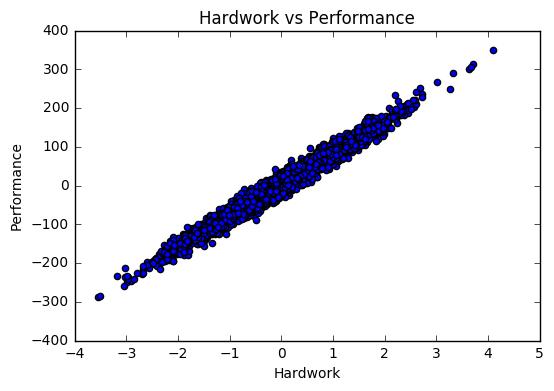

In [5]:
plt.scatter(X,Y)
plt.title("Hardwork vs Performance")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()


In [6]:
X.shape,Y.shape

((3750, 1), (3750, 1))

In [7]:
X=X.values
Y=Y.values

In [8]:
print(X)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ..., 
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]


In [9]:
print(Y)

[[ -9.11011171e-02]
 [ -5.34677208e+01]
 [  7.54570088e+01]
 ..., 
 [ -3.49832749e+01]
 [  1.45206092e+02]
 [ -1.71244939e+01]]


In [10]:
#Normalisation: we will only normalise the x values, we do not normalise the y values
u=X.mean()
std=X.std()
X=(X-u)/std
print(X)

[[-0.25352061]
 [-0.55541377]
 [ 1.07380656]
 ..., 
 [-0.26950343]
 [ 1.72730762]
 [-0.4575866 ]]


In [11]:
def hypothesise(X,theta):
    y_=theta[1]*X+theta[0]
    return y_
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_=hypothesise(X[i],theta)
        y=Y[i]
        grad[0]+=(y_ -y)
        grad[1]+=(y_ -y)*X[i]
    return grad/m
def gradient_descent(X,Y,max_steps=100,learning_rate=0.1):
    theta=np.zeros((2,))
    error_list=[]
    for i in range(max_steps):
        
        grad=gradient(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)        
        
        theta[0]=theta[0]-learning_rate*grad[0]
        theta[1]=theta[1]-learning_rate*grad[1]
        
    return theta,error_list


def error(X,Y,theta):
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        y=Y[i]
        y_=hypothesise(X[i],theta)
        total_error+=(y_ - y)**2
    return total_error/m

        
     
    

In [12]:
 theta,error_list=gradient_descent(X,Y)

In [13]:
theta

array([  0.6838508 ,  79.90361453])

In [14]:
error_list

[array([ 6576.35005246]),
 array([ 5363.12510257]),
 array([ 4380.41289317]),
 array([ 3584.41600355]),
 array([ 2939.65852295]),
 array([ 2417.40496367]),
 array([ 1994.37958066]),
 array([ 1651.72902041]),
 array([ 1374.18206661]),
 array([ 1149.36903404]),
 array([ 967.27047765]),
 array([ 819.77064698]),
 array([ 700.29578413]),
 array([ 603.52114523]),
 array([ 525.13368772]),
 array([ 461.63984713]),
 array([ 410.20983626]),
 array([ 368.55152745]),
 array([ 334.80829731]),
 array([ 307.47628091]),
 array([ 285.33734761]),
 array([ 267.40481165]),
 array([ 252.87945752]),
 array([ 241.11392067]),
 array([ 231.58383582]),
 array([ 223.8644671]),
 array([ 217.61177843]),
 array([ 212.54710061]),
 array([ 208.44471157]),
 array([ 205.12177646]),
 array([ 202.43019901]),
 array([ 200.25002128]),
 array([ 198.48407732]),
 array([ 197.05366271]),
 array([ 195.89502687]),
 array([ 194.95653185]),
 array([ 194.19635088]),
 array([ 193.58060429]),
 array([ 193.08184956]),
 array([ 192.677

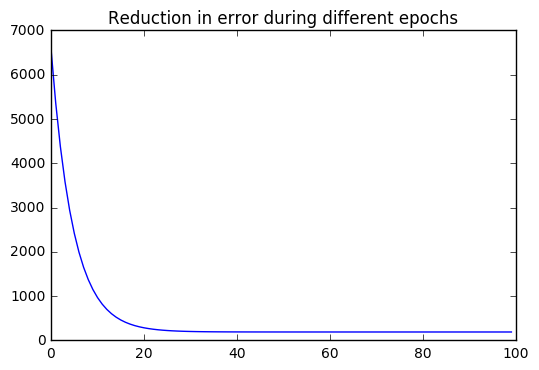

In [15]:
plt.plot(error_list)
plt.title("Reduction in error during different epochs")
plt.show()

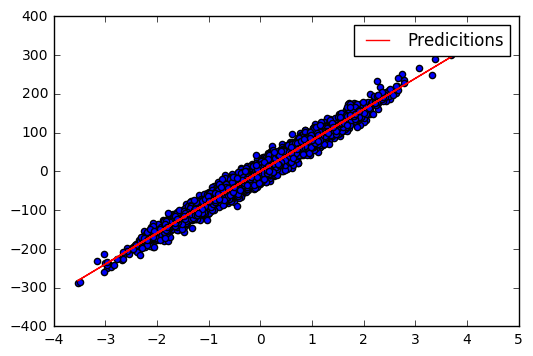

In [16]:
y_=hypothesise(X,theta)
plt.scatter(X,Y)
plt.plot(X,y_,color="red",label="Predicitions")
plt.legend()
plt.show()

In [17]:
X_test=pd.read_csv(r"C:\Users\KIIT\Desktop\projects\hard work pays off/Linear_X_test.csv")

In [19]:
y_test=hypothesise(X_test,theta).values
data=pd.DataFrame(y_test,columns=["y"])
data.to_csv("y_predictions.csv",index=False)

In [20]:
#computing the accuracy using the r_2 score
def r2_score(Y,y_):
    #instead of using the loop we can use the np.sum as it is fast and easier
    numerator=np.sum((Y-y_)**2)
    denominator=np.sum((Y-y_.mean())**2)
    r2_score=1-(numerator/denominator)
    return r2_score
    

In [21]:
r2_score(Y,y_)

0.97096122269716578

In [22]:
#surface plots and contours
#surface plots are used in visualisation of the loss function in machine learning and deeplearning 
#they aare also used as the state surfaces in the reinforcement learning 
a=np.array([1,2,3])
b=np.array([4,5,6,7])
a,b=np.meshgrid(a,b)
print(a)
print(b)

[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]
 [6 6 6]
 [7 7 7]]


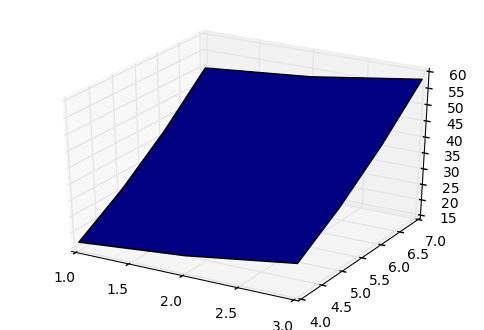

In [27]:
#from mpl_toolkits.mplot3d import Axes3d
fig=plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(a,b,a**2+b**2)
plt.show()

C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\KIIT\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


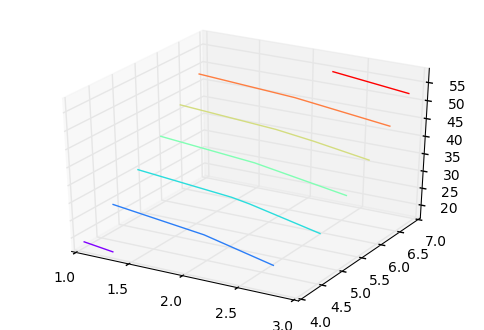

In [28]:
fig=plt.figure()
axes = fig.gca(projection='3d')
axes.contour(a,b,a**2+b**2,cmap="rainbow")
plt.show()